In [1]:
import keras

Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np
import glob

In [3]:
schema_train_3 = {
    'IsBeta': np.int8,
    'RtpStateBitfield': np.int8,
    'IsSxsPassiveMode': np.int8,
    'DefaultBrowsersIdentifier': np.int16,
    'AVProductStatesIdentifier': np.int32,
    'AVProductsInstalled': np.int8,
    'AVProductsEnabled': np.int8,
    'HasTpm': np.int8,
    'CountryIdentifier': np.int16,
    'CityIdentifier': np.int32,
    'OrganizationIdentifier': np.int8,
    'GeoNameIdentifier': np.int16,
    'LocaleEnglishNameIdentifier': np.int16,
    'OsBuild': np.int16,
    'OsSuite': np.int16,
    'IsProtected': np.int8,
    'AutoSampleOptIn': np.int8,
    'SMode': np.int8,
    'IeVerIdentifier': np.int16,
    'Firewall': np.int8,
    'UacLuaenable': np.int32,
    'Census_OEMNameIdentifier': np.int16,
    'Census_OEMModelIdentifier': np.int32,
    'Census_ProcessorCoreCount': np.int16,
    'Census_ProcessorManufacturerIdentifier': np.int8,
    'Census_ProcessorModelIdentifier': np.int16,
    'Census_PrimaryDiskTotalCapacity': np.int32,
    'Census_SystemVolumeTotalCapacity': np.int32,
    'Census_HasOpticalDiskDrive': np.int8,
    'Census_TotalPhysicalRAM': np.int32,
    'Census_InternalPrimaryDiagonalDisplaySizeInInches': np.float16,
    'Census_InternalPrimaryDisplayResolutionHorizontal': np.float16,
    'Census_InternalPrimaryDisplayResolutionVertical': np.int16,
    'Census_InternalBatteryNumberOfCharges': np.int32,
    'Census_OSBuildNumber': np.int16,
    'Census_OSBuildRevision': np.int32,
    'Census_OSInstallLanguageIdentifier': np.int8,
    'Census_OSUILocaleIdentifier': np.int16,
    'Census_IsPortableOperatingSystem': np.int8,
    'Census_IsFlightingInternal': np.int8,
    'Census_IsFlightsDisabled': np.int8,
    'Census_ThresholdOptIn': np.int8,
    'Census_FirmwareManufacturerIdentifier': np.int16,
    'Census_FirmwareVersionIdentifier': np.int32,
    'Census_IsSecureBootEnabled': np.int8,
    'Census_IsWIMBootEnabled': np.int8,
    'Census_IsVirtualDevice': np.int8,
    'Census_IsTouchEnabled': np.int8,
    'Census_IsPenCapable': np.int8,
    'Census_IsAlwaysOnAlwaysConnectedCapable': np.int8,
    'Wdft_IsGamer': np.int8,
    'Wdft_RegionIdentifier': np.int8,
    'HasDetections': np.int8,
    'Census_InternalBatteryType_informed': np.int8,
    'ProductName_index': np.int8,
    'Platform_index': np.int8,
    'Processor_index': np.int8,
    'OsPlatformSubRelease_index': np.int8,
    'OsBuildLab_index': np.int16,
    'SkuEdition_index': np.int8,
    'PuaMode_index': np.int8,
    'SmartScreen_index': np.int8,
    'Census_MDC2FormFactor_index': np.int8,
    'Census_DeviceFamily_index': np.int8,
    'Census_ProcessorClass_index': np.int8,
    'Census_PrimaryDiskTypeName_index': np.int8,
    'Census_ChassisTypeName_index': np.int8,
    'Census_PowerPlatformRoleName_index': np.int8,
    'Census_InternalBatteryType_index': np.int8,
    'Census_OSArchitecture_index': np.int8,
    'Census_OSBranch_index': np.int8,
    'Census_OSEdition_index': np.int8,
    'Census_OSSkuName_index': np.int8,
    'Census_OSInstallTypeName_index': np.int8,
    'Census_OSWUAutoUpdateOptionsName_index': np.int8,
    'Census_GenuineStateName_index': np.int8,
    'Census_ActivationChannel_index': np.int8,
    'Census_FlightRing_index': np.int8,
    'Census_OSVersion_index': np.int16,
    'EngineVersion_index': np.int8,
    'AppVersion_index': np.int8,
    'AvSigVersion_index': np.int16,
    'OsVer_index': np.int8,
    'Census_OSVersion_0_index': np.int8,
    'Census_OSVersion_1_index': np.int16,
    'EngineVersion_0_index': np.int8,
    'EngineVersion_1_index': np.int8,
    'AppVersion_0_index': np.int8,
    'AppVersion_1_index': np.int8,
    'AvSigVersion_0_index': np.int8,
    'AvSigVersion_1_index': np.int16,
    'OsVer_0_index': np.int8,
    'OsVer_1_index': np.int8,
    'OsBuildLab_diff': np.int8,
    'AvSigVersion_diff': np.int16,
    'OSVersion_diff': np.int8,
    'OSBuild_fulldiff': np.int8,
    'AvSigVersion_fulldiff': np.int8,
    'OsBuildLab_difftotal': np.int16,
    'DateAvSigVersion_difftotal': np.int16,
    'DateOSVersion_difftotal': np.int16,
    'DateAvSigVersion_fulldifftotal': np.int8,
    'OsBuildLab_fulldifftotal': np.int8,
    'DateAvSigVersion_ratio': np.float16,
    'OsBuildLab_ratio': np.float16,
    'OSVersion_ratio': np.float16,
    'DateAvSigVersion_fullratio': np.float16,
    'OsBuildLab_fullratio': np.float16,
    'OsBuildLab_dayOfWeek': np.int8,
    'AvSigVersion_dayOfWeek': np.int8,
    'prediction_2': np.int8,
    'prediction_4': np.int8,
    'prediction_8': np.int8,
    'prediction_16': np.int8,
    'prediction_32': np.int8,
    'prediction_64': np.int8,
    'count(DISTINCT AvSigVersion_Name)': np.int16,
    'count(DISTINCT AvSigVersion_Type)': np.int8,
    'count(DISTINCT AvSigVersion_AlertLevel)': np.int8
}

In [4]:

print('Cargando datos del TRAIN')
path = '../../data/train_final_3'
allFiles = glob.glob(path + "/*.csv")
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_)
    df = (df.fillna(-1)).astype(schema_train_3)
    list_.append(df)

train = pd.concat(list_, axis = 0, ignore_index = True)

sel_cols = [c for c in train.columns if c not in ['MachineIdentifier',
                                                      'HasDetections',
                                                      'Census_DeviceFamily_Windows.Server',
                                                      'Census_DeviceFamily_Windows.Desktop'
                                                     ]]



Cargando datos del TRAIN


In [34]:
X = train.loc[:, sel_cols]
y = train.loc[:,'HasDetections']


In [32]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [38]:
print("X_train :"+str(X_train.shape))

print("X_test :"+str(X_test.shape))


print("y_train :"+str(y_train.shape))

print("y_test :"+str(y_test.shape))

X_train :(6691112, 118)
X_test :(2230371, 118)
y_train :(6691112,)
y_test :(2230371,)


In [5]:
from keras.models import Sequential
from keras.layers import Dense

# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import cross_val_score
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import StratifiedKFold
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline

In [6]:
X_train.head()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,...,AvSigVersion_dayOfWeek,prediction_2,prediction_4,prediction_8,prediction_16,prediction_32,prediction_64,count(DISTINCT AvSigVersion_Name),count(DISTINCT AvSigVersion_Type),count(DISTINCT AvSigVersion_AlertLevel)
0,0,7,0,0,53447,1,1,1,203,-1,...,7,0,0,6,0,0,50,5,2,2
1,0,7,0,0,53447,1,1,1,169,20691,...,5,0,0,0,10,25,49,-1,-1,-1
2,0,7,0,0,53447,1,1,1,57,56452,...,6,0,0,0,12,6,10,-1,-1,-1
3,0,7,0,0,53447,1,1,1,171,151013,...,3,1,1,2,2,2,2,4,2,1
4,0,7,0,0,38993,2,1,1,107,128159,...,6,0,0,0,10,25,46,75,1,2


In [7]:
dimension = X_train.shape[1]

In [ ]:
dimension

In [22]:
from sklearn.metrics import roc_auc_score
import tensorflow as tf

def auroc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)

In [47]:
earlyStopping = keras.callbacks.EarlyStopping(monitor='acc', patience=5, verbose=1, mode='auto')

In [48]:
model = Sequential()
model.add(Dense(10, input_dim=dimension, kernel_initializer='normal', activation='relu'))
model.add(Dense(20, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam',metrics = ['accuracy',auroc])

In [45]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 10)                1190      
_________________________________________________________________
dense_28 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 21        
Total params: 1,431
Trainable params: 1,431
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.fit(X_train, y_train,
          epochs=50,
          batch_size=int(X_train.shape[0]/100),
             callbacks=[earlyStopping])

Epoch 1/50
6691112/6691112 [==============================] - 59s 9us/step - loss: 7.5660 - acc: 0.5069 - auroc: 0.5058
Epoch 2/50
6691112/6691112 [==============================] - 59s 9us/step - loss: 4.3734 - acc: 0.5103 - auroc: 0.5081
Epoch 3/50
6691112/6691112 [==============================] - 64s 10us/step - loss: 0.7322 - acc: 0.5092 - auroc: 0.5085
Epoch 4/50
6691112/6691112 [==============================] - 69s 10us/step - loss: 0.6945 - acc: 0.5016 - auroc: 0.5043
Epoch 5/50
6691112/6691112 [==============================] - 60s 9us/step - loss: 0.7233 - acc: 0.5002 - auroc: 0.4998
Epoch 6/50
6691112/6691112 [==============================] - 65s 10us/step - loss: 0.6934 - acc: 0.5002 - auroc: 0.5007
Epoch 7/50
6691112/6691112 [==============================] - 62s 9us/step - loss: 0.6934 - acc: 0.5002 - auroc: 0.5007
Epoch 00007: early stopping


In [53]:
score = model.evaluate(X_test, y_test, batch_size=int(X_train.shape[0]/100),verbose=1)

2230371/2230371 [==============================] - 3s 1us/step


In [54]:
score

[0.6932218039421495, 0.5002387464878533, 0.5007222205568543]

In [55]:
import matplotlib.pyplot as plt

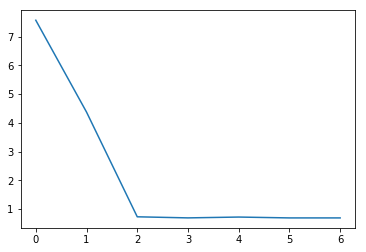

In [56]:
plt.plot(model.history.history['loss'])


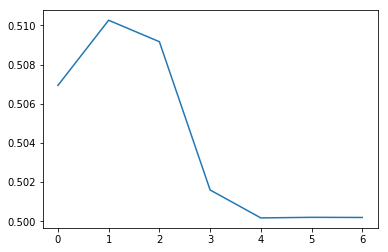

In [57]:
plt.plot(model.history.history['acc'])

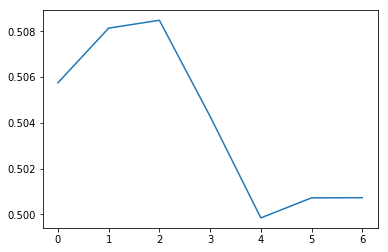

In [59]:
plt.plot(model.history.history['auroc'])

In [58]:
model.history.history

{'loss': [7.565966159336019,
  4.3733996858749435,
  0.732216484782747,
  0.6944769450673035,
  0.7233158193489982,
  0.6934061318297489,
  0.693355722707039],
 'acc': [0.506934721549937,
  0.5102595793422855,
  0.5091645468260516,
  0.5016000345029781,
  0.5001732154127996,
  0.5002034062777867,
  0.5001959339804348],
 'auroc': [0.5057505093759436,
  0.5081396984714356,
  0.5084847535776144,
  0.5042819759053976,
  0.4998414732647296,
  0.5007192595474861,
  0.5007257996999611]}

In [ ]:
model.predict_proba(X_test)

## Prediction

In [ ]:
print('Cargando datos del TEST')
path = '../../data/test_final_3'
allFiles = glob.glob(path + "/*.csv")
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_)
    df = (df.fillna(-1)).astype(schema_train_3)
    list_.append(df)


test = pd.concat(list_, axis = 0, ignore_index = True).fillna(-1)

sel_cols = [c for c in test.columns if c not in ['MachineIdentifier',
                                                 'HasDetections',
                                                 'Census_DeviceFamily_Windows.Server',
                                                 'Census_DeviceFamily_Windows.Desktop'
                                                 ]
            ]

X_test = test.loc[:, sel_cols]

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions

### Save train in one file

In [25]:
train.to_csv("train_uniq.csv")